In [5]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import sys, os
sys.path.append(os.path.join(os.path.dirname('Demand'), '..', 'src'))
from Demand import Demand

In [20]:
path = '../data/demand_lower_48'

In [21]:
nat_dem = Demand()

In [22]:
nat_dem.load_and_clean_data(path)

In [23]:
df = nat_dem.dataframe

In [25]:
df = df['Megawatthours']

In [26]:
df_pr = df.reset_index()

In [28]:
df_pr.head()

,Time,Megawatthours
0,2015-07-01 02:00:00,335153
1,2015-07-01 03:00:00,333837
2,2015-07-01 04:00:00,398386
3,2015-07-01 05:00:00,388954
4,2015-07-01 06:00:00,392487


In [29]:
df_pr.columns = ['ds', 'y']

In [30]:
df_pr.head()

,ds,y
0,2015-07-01 02:00:00,335153
1,2015-07-01 03:00:00,333837
2,2015-07-01 04:00:00,398386
3,2015-07-01 05:00:00,388954
4,2015-07-01 06:00:00,392487


In [14]:
split_index = 40919

In [31]:
train = df_pr[:split_index]
test = df_pr[split_index:]

In [32]:
m = Prophet()

In [33]:
m.fit(train)

In [34]:
future = m.make_future_dataframe(periods=len(test), freq='H')

In [37]:
future

,ds
0,2015-07-01 02:00:00
1,2015-07-01 03:00:00
2,2015-07-01 04:00:00
3,2015-07-01 05:00:00
4,2015-07-01 06:00:00
5,2015-07-01 07:00:00
6,2015-07-01 08:00:00
7,2015-07-01 09:00:00
8,2015-07-01 10:00:00
9,2015-07-01 11:00:00


In [38]:
preds = m.predict(future)

In [39]:
preds

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-07-01 02:00:00,427148.239945,427148.239945,427148.239945,394883.693629,487245.904341,16262.428593,16262.428593,16262.428593,-51076.359089,...,0.0,0.0,0.0,10978.695004,10978.695004,10978.695004,56360.092678,56360.092678,56360.092678,443410.668538
1,2015-07-01 03:00:00,427153.979710,427153.979710,427153.979710,383184.494131,474673.355581,865.122286,865.122286,865.122286,-66615.827394,...,0.0,0.0,0.0,11041.889901,11041.889901,11041.889901,56439.059779,56439.059779,56439.059779,428019.101996
2,2015-07-01 04:00:00,427159.719475,427159.719475,427159.719475,372664.573832,465430.457553,-7765.872751,-7765.872751,-7765.872751,-75408.445785,...,0.0,0.0,0.0,11124.370146,11124.370146,11124.370146,56518.202888,56518.202888,56518.202888,419393.846724
3,2015-07-01 05:00:00,427165.459239,427165.459239,427165.459239,375266.479380,464339.144314,-8197.000465,-8197.000465,-8197.000465,-76018.838875,...,0.0,0.0,0.0,11224.316786,11224.316786,11224.316786,56597.521624,56597.521624,56597.521624,418968.458774
4,2015-07-01 06:00:00,427171.199004,427171.199004,427171.199004,379445.989648,474514.437445,-50.997780,-50.997780,-50.997780,-68067.665197,...,0.0,0.0,0.0,11339.651819,11339.651819,11339.651819,56677.015598,56677.015598,56677.015598,427120.201224
5,2015-07-01 07:00:00,427176.938768,427176.938768,427176.938768,400812.554422,490591.151180,15024.325299,15024.325299,15024.325299,-53200.440906,...,0.0,0.0,0.0,11468.081797,11468.081797,11468.081797,56756.684409,56756.684409,56756.684409,442201.264067
6,2015-07-01 08:00:00,427182.678533,427182.678533,427182.678533,415426.011333,504095.399786,33466.006824,33466.006824,33466.006824,-34977.663889,...,0.0,0.0,0.0,11607.143069,11607.143069,11607.143069,56836.527644,56836.527644,56836.527644,460648.685357
7,2015-07-01 09:00:00,427188.418298,427188.418298,427188.418298,431909.782159,523842.436402,51307.338578,51307.338578,51307.338578,-17363.454287,...,0.0,0.0,0.0,11754.247983,11754.247983,11754.247983,56916.544881,56916.544881,56916.544881,478495.756876
8,2015-07-01 10:00:00,427194.158062,427194.158062,427194.158062,446221.247013,537493.905853,66063.619769,66063.619769,66063.619769,-2839.847288,...,0.0,0.0,0.0,11906.731371,11906.731371,11906.731371,56996.735687,56996.735687,56996.735687,493257.777831
9,2015-07-01 11:00:00,427199.897827,427199.897827,427199.897827,458150.602057,550313.200432,77515.851397,77515.851397,77515.851397,8376.855150,...,0.0,0.0,0.0,12061.896632,12061.896632,12061.896632,57077.099616,57077.099616,57077.099616,504715.749224


In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

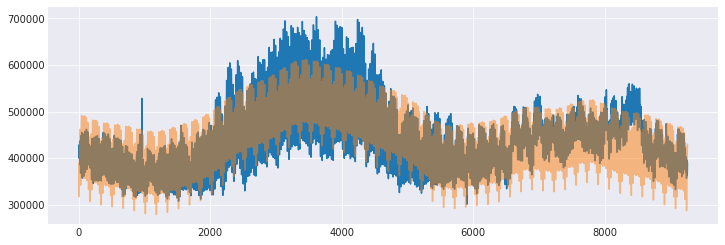

In [43]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(range(len(test)), test['y'])
ax.plot(range(len(test)), preds.loc[split_index:, 'yhat'], alpha=0.5)
plt.show()